In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data = pd.read_csv("ProcessedChat.csv", index_col=0)
Data['Year'] = Data['Year'].astype(np.int32)
Data['Day'] = Data['Day'].astype(np.int32)
Data['Hour'] = Data['Hour'].astype(np.int32)
Data['Minute'] = Data['Minute'].astype(np.int32)
Data.drop(Data[Data.Sender == 'Notification'].index, inplace= True)
Data.head()

,Message,Sender,Year,Month,Day,Hour,Minute
3,Interviews me issi me karvate hai\n,Rishi,2022,December,27,12,1
4,"Interview toh nhi hi dena hai, degree le bhi l...",Dani,2022,December,27,12,1
5,Chutoya h bsdk ....unka khudka environment hot...,Shushu Bhai IIITDM,2022,December,27,12,1
6,Jake dekh yt pe google kisme karvata hai inter...,Rishi,2022,December,27,12,1
7,@919179170555 kya liya hai bhai NPTEL?\n,Dani,2022,December,27,12,2


In [31]:
Data.dtypes

Message    object
Sender     object
Year        int32
Month      object
Day         int32
Hour        int32
Minute      int32
dtype: object

In [33]:
# Message send by Total message send by eveyone
BusyUsers  = Data.Sender.value_counts().head(7)
BusyUsers

Sender
Dani                  1338
Rishi                 1130
Pushkar Bhai          1032
Booboo Bhai            892
Yusuf IIITDM           365
Shushu Bhai IIITDM     261
Ayush                  198
Name: count, dtype: int64

<BarContainer object of 7 artists>

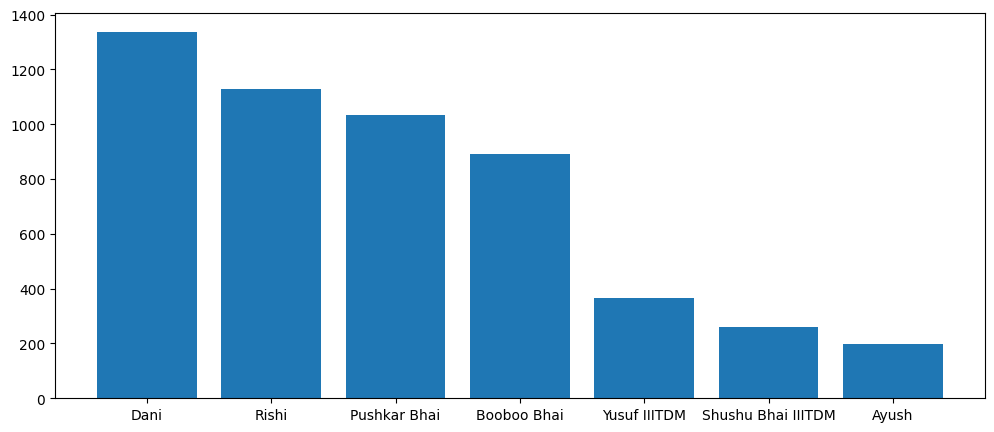

In [27]:
plt.figure(figsize=(12,5))
plt.bar(BusyUsers.index, BusyUsers.values)

Calculating the percentage of Message sent

In [43]:
round((Data.Sender.value_counts()/Data.shape[0])*100,2).reset_index().rename(columns = {'count':"Percent"})
# This is in the form of a DataFrame

,Sender,Percent
0,Dani,25.65
1,Rishi,21.66
2,Pushkar Bhai,19.79
3,Booboo Bhai,17.10
4,Yusuf IIITDM,7.00
5,Shushu Bhai IIITDM,5.00
6,Ayush,3.80
